[0.7242, 0.7277, 0.7243, 0.7213, 0.7255, 0.7239, 0.723, 0.7263, 0.7272] [0.0782, 0.0761, 0.0765, 0.081, 0.0726, 0.078, 0.0785, 0.0731, 0.0769]
[0.406, 0.4131, 0.4074, 0.4057, 0.4074, 0.41, 0.4006, 0.4065, 0.4097] [0.1521, 0.1521, 0.1526, 0.1501, 0.1513, 0.1511, 0.1519, 0.1509, 0.1503]
[0.2117, 0.2139, 0.2118, 0.2109, 0.2116, 0.2113, 0.2105, 0.2109, 0.2103] [0.1015, 0.1033, 0.1025, 0.1019, 0.1014, 0.1013, 0.1009, 0.1011, 0.0999]
[0.7919, 0.7919, 0.7912, 0.792, 0.7911, 0.7905, 0.7884, 0.7902, 0.7898] [0.0396, 0.0385, 0.0395, 0.0384, 0.0397, 0.04, 0.0452, 0.0425, 0.0417]
[0.5972, 0.5972, 0.5974, 0.5966, 0.597, 0.5947, 0.5945, 0.5952, 0.5954] [0.0889, 0.0877, 0.0879, 0.0892, 0.0877, 0.0898, 0.0913, 0.0903, 0.0889]
[0.4613, 0.4616, 0.4614, 0.4614, 0.4613, 0.4612, 0.4611, 0.4611, 0.4611] [0.11, 0.1097, 0.1099, 0.1099, 0.11, 0.1101, 0.1102, 0.1102, 0.1102]
[0.828, 0.8285, 0.8286, 0.8277, 0.8276, 0.828, 0.8273, 0.8278, 0.8284] [0.0486, 0.0477, 0.0476, 0.049, 0.0492, 0.0486, 0.0497, 0.0489, 0.0

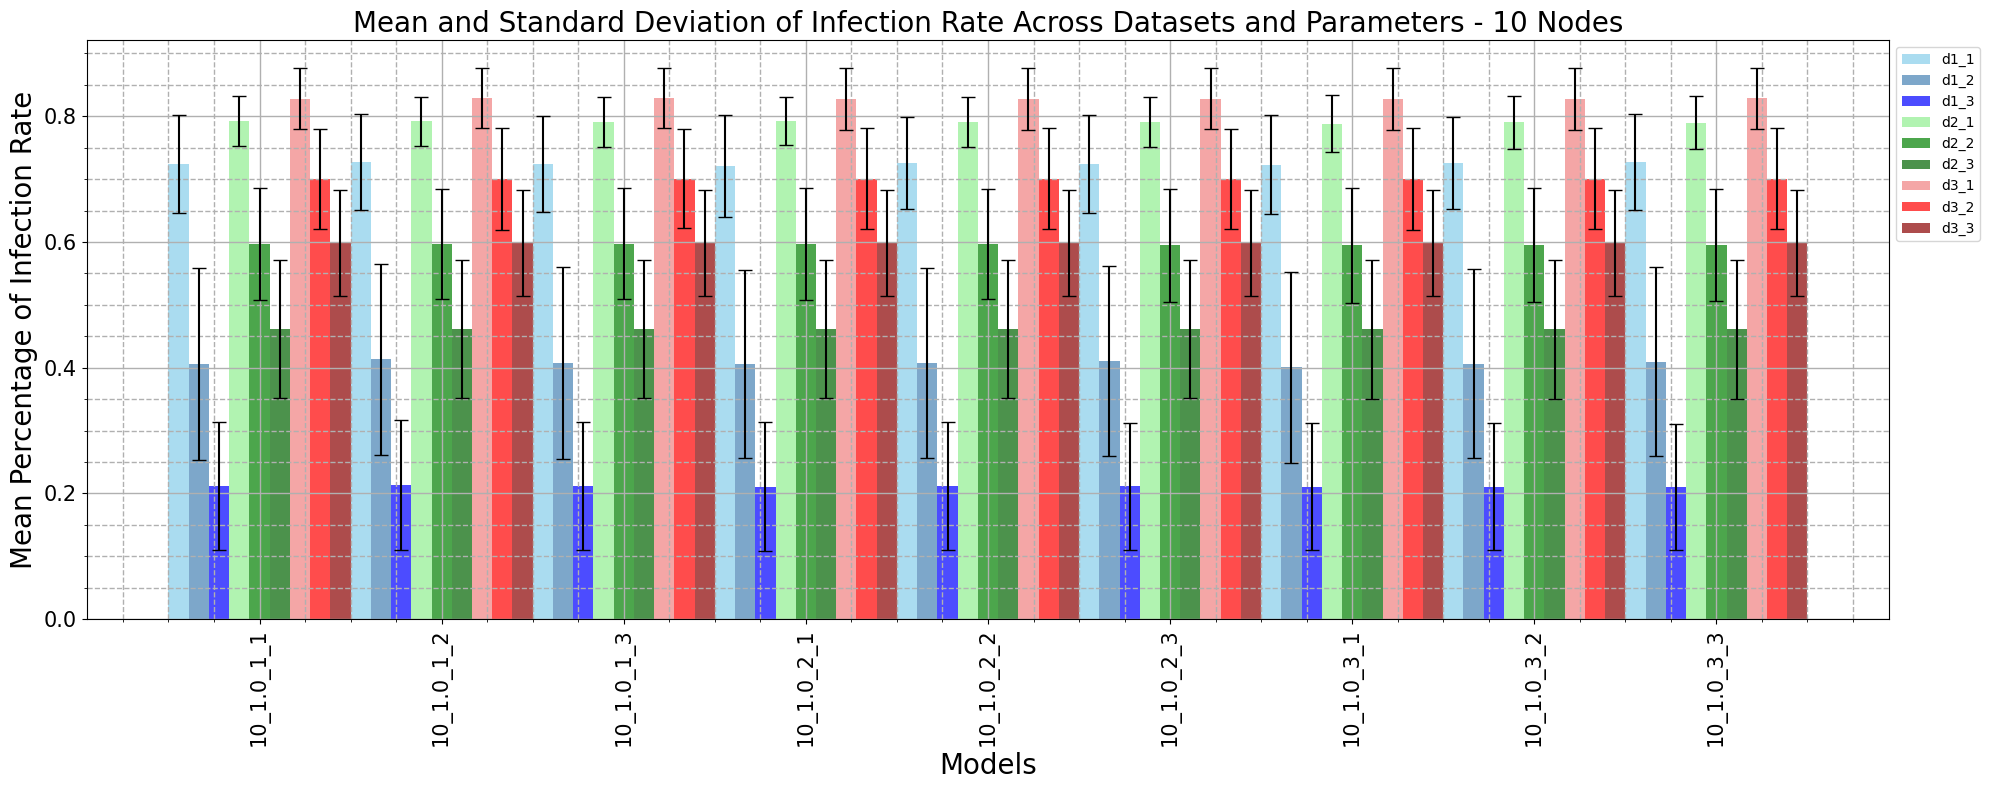

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to extract mean and standard deviation values from the dataset
def extract_mean_std(value_str):
    parts = value_str.split(',')
    mean = float(parts[0].split(':')[1].strip())
    std_dev = float(parts[1].split(':')[1].strip())

    # convert to log scale
    return mean, std_dev

# Load your dataset here
data = pd.read_csv('inference_results_10.csv')
# Assuming 'models' variable contains the model identifiers
models = data['model']

# Initial setup
bar_width = 0.3  # Narrower bars to fit all within each dataset group without overlap
opacity_overlapped = 0.7
num_datasets = 3  # e.g., d1, d2, d3
num_params = 3  # Parameters per dataset, e.g., 1, 2, 3
gap_between_groups = bar_width * num_params  # Gap between each dataset group

# Calculating indices for the x-axis, adjusting for non-overlapping
indices = np.arange(len(models)) * (gap_between_groups * num_datasets)

fig, ax = plt.subplots(figsize=(20, 8))

color_dict = {'d1_1': 'skyblue', 'd1_2': 'steelblue', 'd1_3': 'blue',
              'd2_1': 'lightgreen', 'd2_2': 'green', 'd2_3': 'darkgreen',
              'd3_1': 'lightcoral', 'd3_2': 'red', 'd3_3': 'darkred'}

# Plotting each parameter for all datasets, with error bars and no overlap
for i, dataset in enumerate(['d1', 'd2', 'd3']):
    for j, param in enumerate(['1', '2', '3']):
        data_col = f'{dataset}_{param}'
        means_stds = data[data_col].apply(extract_mean_std)
        means = [ms[0] for ms in means_stds]
        stds = [ms[1] for ms in means_stds]
        print(means, stds)
        # Adjust bar positions to group by dataset and separate by parameter
        positions = indices + (i * gap_between_groups) + (j * bar_width)
        ax.bar(positions, means, bar_width, yerr=stds, color=color_dict[data_col],
               alpha=opacity_overlapped, label=f'{dataset}_{param}', capsize=5)

# Finalizing the plot
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Mean Percentage of Infection Rate', fontsize=20)
ax.set_title('Mean and Standard Deviation of Infection Rate Across Datasets and Parameters - 10 Nodes', fontsize=20)
# Adjust the x-axis ticks to align them with the groups of bars
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(indices + (gap_between_groups * num_datasets / 2) - (bar_width / 2))
ax.set_xticklabels(models, rotation=90, fontsize=15)
# set y-scale to log
# ax.set_yscale('log')

# set theme to grid with small grid lines
# Enable major grid lines
plt.grid(True, which='major', linestyle='-', linewidth=1)

# Enable minor grid lines
plt.minorticks_on()  # This is necessary to turn on the minor ticks.
plt.grid(True, which='minor', linestyle='--', linewidth=1)


# poistion legend outisde the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
